<a href="https://colab.research.google.com/github/KwakNW/RNN/blob/master/RNN_airplane_passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이번 달의 비행기 승객 수를 통해 다음 달의 비행기 승객예측.


[airplane passengers](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout #히든 레이어 틀을 지정하는 함수
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler #최대/최소값이 각각 1, 0이 되도록 스케일링
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
# 같은 결과를 나오게 하기 위해 seed 설정
numpy.random.seed(2017010794)

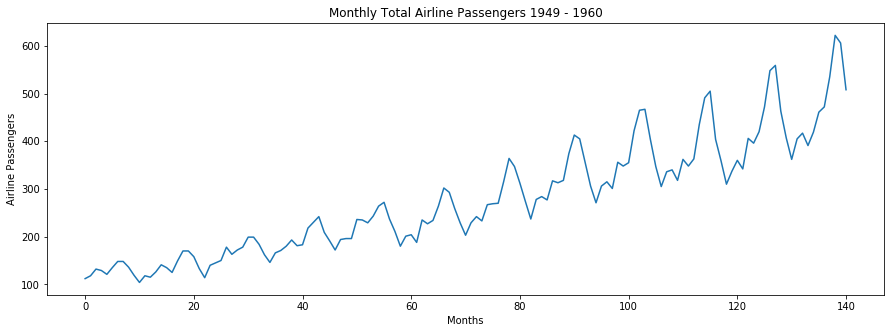

In [ ]:
# 데이터 불러오기
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.figure(figsize = (15, 5))
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.ylabel("Airline Passengers")
plt.xlabel("Months")
plt.plot(dataset,label = "Airline Passengers")
plt.show()

In [ ]:
dataset

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [ ]:
# 데이터 
dataset = dataset.values # 값만 추출
dataset = dataset.astype('float32')

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# Train data와 Test data로 분할

train_size = int(len(dataset) * 0.67)
# 67%는 train data
# 33%는 test data
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))

94 47


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 이 기본값은 X가 주어진 시간 (t)의 승객 수이고 Y가 다음 시간 (t + 1)의 승객 수인 데이터 세트를 생성합니다.

![x_y](https://drive.google.com/uc?id=1vimfrME79UjDbzV8bmHph42PXWnBoldF)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1 # 한달 전만 봄
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print("trainX:", trainX)

trainX: [[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 

In [ ]:
print("trainY:", trainY)

trainY: [0.02702703 0.05405405 0.04826255 0.03281853 0.05984557 0.08494207
 0.08494207 0.06177607 0.02895753 0.         0.02702703 0.02123553
 0.04247104 0.07142857 0.05984557 0.04054055 0.08687258 0.12741312
 0.12741312 0.10424709 0.05598456 0.01930502 0.06949806 0.07915059
 0.08880308 0.14285713 0.11389962 0.13127413 0.14285713 0.18339768
 0.18339768 0.15444016 0.11196911 0.08108109 0.1196911  0.12934363
 0.14671814 0.17181468 0.14864865 0.15250966 0.22007722 0.24324325
 0.26640925 0.2027027  0.16795367 0.13127413 0.17374519 0.17760617
 0.17760617 0.25482625 0.25289574 0.24131274 0.26833975 0.3088803
 0.32432434 0.25675675 0.20656371 0.14671814 0.18725869 0.19305018
 0.16216215 0.25289574 0.23745173 0.25096524 0.3088803  0.38223937
 0.36486486 0.2992278  0.24131274 0.1911197  0.24131274 0.26640925
 0.24903473 0.31467178 0.3185328  0.32046333 0.4073359  0.5019305
 0.46911195 0.40154442 0.32818535 0.25675675 0.3359073  0.34749034
 0.33397684 0.41119692 0.4034749  0.4131274  0.52123547 

In [ ]:
trainX.shape

(92, 1)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1])) 
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential() #순차모델 이용
model.add(LSTM(4, input_shape=(1, look_back)))
#input_shape : 첫번째 레이어에 입력값 정의

model.add(Dense(1)) #입력받을 크기 Dense => 노드끼리 서로 모두 연결되어 있다.
model.compile(loss='mean_squared_error', optimizer='adam') #training을 위해 모델 환경을 만든다.

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) 
#100번 반복 배치크기 1

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.0263
Epoch 2/100
 - 0s - loss: 0.0121
Epoch 3/100
 - 0s - loss: 0.0101
Epoch 4/100
 - 0s - loss: 0.0093
Epoch 5/100
 - 0s - loss: 0.0085
Epoch 6/100
 - 0s - loss: 0.0077
Epoch 7/100
 - 0s - loss: 0.0069
Epoch 8/100
 - 0s - loss: 0.0062
Epoch 9/100
 - 0s - loss: 0.0054
Epoch 10/100
 - 0s - loss: 0.0048
Epoch 11/100
 - 0s - loss: 0.0043
Epoch 12/100
 - 0s - loss: 0.0036
Epoch 13/100
 - 0s - loss: 0.0031
Epoch 14/100
 - 0s - loss: 0.0028
Epoch 15/100
 - 0s - loss: 0.0025
Epoch 16/100
 - 0s - loss: 0.0023
Epoch 17/100
 - 0s - loss: 0.0022
Epoch 18/100
 - 0s - loss: 0.0021
Epoch 19/100
 - 0s - loss: 0.0020
Epoch 20/100
 - 0s - loss: 0.0020
Epoch 21/100
 - 0s - loss: 0.0020
Epoch 22/100
 - 0s - loss: 0.0019
Epoch 23/100
 - 0s - loss: 0.0019
Epoch 24/100
 - 0s - loss: 0.0019
Epoch 25/100
 - 0s - loss: 0.0019
Epoch 26/100
 - 0s - loss: 0.0019
Epoch 27/100
 - 0s - loss: 0.0019
Epoch 28/100
 - 0s - loss: 0.0019
Epoch 29/

In [ ]:
# 모델 적용
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 예측 결과에 적용할 수 있도록 역변환
trainPredict = scaler.inverse_transform(trainPredict) 
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Root MSE 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#RMSE값은 작을수록 정밀도가 높은거

Train Score: 22.19 RMSE
Test Score: 47.18 RMSE


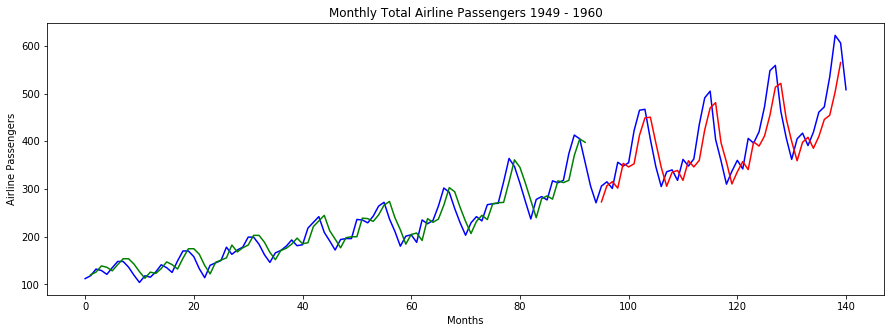

In [ ]:
# 원본 데이터 세트가 파란색으로 표시
# 훈련 데이터 세트의 예상은 녹색으로 표시
# 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize = (15, 5))
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.ylabel("Airline Passengers")
plt.xlabel("Months")
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='red')

plt.show()

## LSTM for Regression Using the Window Method

 위에서는 한달 전의 데이터로 다음달을 보는 것이었다면 
 
아래에서 볼 데이터는 두세달전의 데이터도 보는 것.

![x_y](https://drive.google.com/uc?id=1efeguiUsZfWZfqwh74cmtAWLeoF6xNwM)

In [ ]:
# 데이터 불러오기
dataframe = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# Train data와 Test data로 분할

train_size = int(len(dataset) * 0.67)
# 67%는 train data
# 33%는 test data
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [ ]:
############## 변경된 부분 ##############
look_back = 3   # 위에서는 1이었는데 3으로 변경
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print("trainX:", trainX)

trainX: [[0.01544401 0.02702703 0.05405405]
 [0.02702703 0.05405405 0.04826255]
 [0.05405405 0.04826255 0.03281853]
 [0.04826255 0.03281853 0.05984557]
 [0.03281853 0.05984557 0.08494207]
 [0.05984557 0.08494207 0.08494207]
 [0.08494207 0.08494207 0.06177607]
 [0.08494207 0.06177607 0.02895753]
 [0.06177607 0.02895753 0.        ]
 [0.02895753 0.         0.02702703]
 [0.         0.02702703 0.02123553]
 [0.02702703 0.02123553 0.04247104]
 [0.02123553 0.04247104 0.07142857]
 [0.04247104 0.07142857 0.05984557]
 [0.07142857 0.05984557 0.04054055]
 [0.05984557 0.04054055 0.08687258]
 [0.04054055 0.08687258 0.12741312]
 [0.08687258 0.12741312 0.12741312]
 [0.12741312 0.12741312 0.10424709]
 [0.12741312 0.10424709 0.05598456]
 [0.10424709 0.05598456 0.01930502]
 [0.05598456 0.01930502 0.06949806]
 [0.01930502 0.06949806 0.07915059]
 [0.06949806 0.07915059 0.08880308]
 [0.07915059 0.08880308 0.14285713]
 [0.08880308 0.14285713 0.11389962]
 [0.14285713 0.11389962 0.13127413]
 [0.11389962 0.13127

In [ ]:
print("trainY:", trainY)

trainY: [0.04826255 0.03281853 0.05984557 0.08494207 0.08494207 0.06177607
 0.02895753 0.         0.02702703 0.02123553 0.04247104 0.07142857
 0.05984557 0.04054055 0.08687258 0.12741312 0.12741312 0.10424709
 0.05598456 0.01930502 0.06949806 0.07915059 0.08880308 0.14285713
 0.11389962 0.13127413 0.14285713 0.18339768 0.18339768 0.15444016
 0.11196911 0.08108109 0.1196911  0.12934363 0.14671814 0.17181468
 0.14864865 0.15250966 0.22007722 0.24324325 0.26640925 0.2027027
 0.16795367 0.13127413 0.17374519 0.17760617 0.17760617 0.25482625
 0.25289574 0.24131274 0.26833975 0.3088803  0.32432434 0.25675675
 0.20656371 0.14671814 0.18725869 0.19305018 0.16216215 0.25289574
 0.23745173 0.25096524 0.3088803  0.38223937 0.36486486 0.2992278
 0.24131274 0.1911197  0.24131274 0.26640925 0.24903473 0.31467178
 0.3185328  0.32046333 0.4073359  0.5019305  0.46911195 0.40154442
 0.32818535 0.25675675 0.3359073  0.34749034 0.33397684 0.41119692
 0.4034749  0.4131274  0.52123547 0.5965251  0.58108103 

In [ ]:
trainX.shape

(90, 3)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, 1))
testX = numpy.reshape(testX, (testX.shape[0], 1, 1))

ValueError: ignored

In [ ]:
trainX

In [ ]:
# create and fit the LSTM network
model = Sequential() #순차모델 이용
model.add(LSTM(4, input_shape=(1, look_back)))
#input_shape : 첫번째 레이어에 입력값 정의

model.add(Dense(1)) #입력받을 크기 Dense => 노드끼리 서로 모두 연결되어 있다.
model.compile(loss='mean_squared_error', optimizer='adam') #training을 위해 모델 환경을 만든다.


In [ ]:
model.summary()

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) 
#100번 반복
#배치크기 1

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Root MSE 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# 원본 데이터 세트가 파란색으로 표시
# 훈련 데이터 세트의 예상은 녹색으로 표시
# 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize = (15, 5))
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.ylabel("Airline Passengers")
plt.xlabel("Months")
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='red')

plt.show()

## LSTM for Regression with Time Steps

In [ ]:
# 데이터 불러오기
dataframe = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# Train data와 Test data로 분할

train_size = int(len(dataset) * 0.67)
# 67%는 train data
# 33%는 test data
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3   # 앞에서는 1이었는데 3으로 변경
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print("trainX:", trainX)

In [ ]:
print("trainY:", trainY)

In [ ]:
trainX.shape

In [ ]:
############## 원래 데이터 ##############
# reshape input to be [samples, time steps, features]
# trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
############## 변경된 부분 ##############
# 데이터 모양 변형
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# 순서 변경

In [ ]:
trainX

In [ ]:
# create and fit the LSTM network
model = Sequential() #순차모델 이용
model.add(LSTM(4, input_shape=(look_back, 1))) ##### 3 , 1

model.add(Dense(1)) #입력받을 크기
model.compile(loss='mean_squared_error', optimizer='adam') #training을 위해 모델 환경을 만든다.


In [ ]:
model.summary()

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) 
#100번 반복
#배치크기 1

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# root MSE 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# 원본 데이터 세트가 파란색으로 표시
# 훈련 데이터 세트의 예상은 녹색으로 표시
# 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize = (15, 5))
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.ylabel("Airline Passengers")
plt.xlabel("Months")
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='red')

plt.show()

## LSTM with Memory Between Batches

In [ ]:
# 데이터 불러오기
dataframe = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# Train data와 Test data로 분할

train_size = int(len(dataset) * 0.67)
# 67%는 train data
# 33%는 test data
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3   # 앞에서는 1이었는데 3으로 변경
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print("trainX:", trainX)

In [ ]:
print("trainY:", trainY)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [ ]:
############## 변경된 부분 ##############
# create and fit the LSTM network

batch_size = 1 #배치사이즈 고정
model = Sequential() #순차모델 이용
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))

####### batch_input_shape는 input_shape에 batch_size를 추가한 것.
#이것은 고정된 batch_size를 정의하기에 유용하다
###### stateful = True : 예측을 위해 상태를 유지한다. => 한 배치에서 학습된 상태가 다음 배치 학습 시에 전달되는 방식
#long-term에서 성능을 더 좋게 함

model.add(Dense(1)) #입력받을 크기
model.compile(loss='mean_squared_error', optimizer='adam') #training을 위해 모델 환경을 만든다.


In [ ]:
model.summary()

In [ ]:
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states() #####네트워크 상태 재설정 => 연속 일괄 처리를 연속 입력으로 처리하려는 경우


#100번 반복
#배치크기 1

In [ ]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size) #배치사이즈 추가
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# root MSE 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# 원본 데이터 세트가 파란색으로 표시
# 훈련 데이터 세트의 예상은 녹색으로 표시
# 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize = (15, 5))
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.ylabel("Airline Passengers")
plt.xlabel("Months")
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='red')

plt.show()

## Stacked LSTMs with Memory Between Batches

In [ ]:
# 데이터 불러오기
dataframe = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# Train data와 Test data로 분할

train_size = int(len(dataset) * 0.67)
# 67%는 train data
# 33%는 test data
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3   # 앞에서는 1이었는데 3으로 변경
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print("trainX:", trainX)

In [ ]:
print("trainY:", trainY)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# create and fit the LSTM network
batch_size = 1 
model = Sequential() #순차모델 이용
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))

############## 변경된 부분 ##############
###### return_sequences 후속 LSTM 레이어에 이전의 LSTM 레이어가 시퀀스를 반환 
# LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequences=True 옵션을 사용

model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
###### LSTM을 2개의 layer로 확장

model.add(Dense(1)) #입력받을 크기
model.compile(loss='mean_squared_error', optimizer='adam') #training을 위해 모델 환경을 만든다.

In [ ]:
model.summary()

In [ ]:
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
  #반복문 사용
  
#100번 반복
#배치크기 1

In [ ]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size) #배치사이즈 추가
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Root MSE 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# 원본 데이터 세트가 파란색으로 표시
# 훈련 데이터 세트의 예상은 녹색으로 표시
# 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize = (15, 5))
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.ylabel("Airline Passengers")
plt.xlabel("Months")
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='red')

plt.show()